<a href="https://colab.research.google.com/github/Hirunagrad/TeleChurn-AI/blob/main/Copy_of_Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load cleaned dataset from Team Member 2
df = pd.read_excel("cleaned_telco.xlsx")  # replace with your path

# Drop unnecessary columns for modeling
# Drop unnecessary columns including the original label column
df = df.drop(columns=[
    'CustomerID', 'Churn Reason', 'Lat Long', 'Count',
    'Country', 'State', 'City', 'Zip Code', 'Churn Label',
    'Churn Score'
])



# Separate features and target
X = df.drop(['Churn Value'], axis=1)
y = df['Churn Value']

# Train-Test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Identify categorical columns (object type)
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns to encode:", categorical_cols)

# One-hot encode categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align test set columns with train set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Scale numerical features
numeric_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']
scaler = StandardScaler()
X_train_encoded[numeric_cols] = scaler.fit_transform(X_train_encoded[numeric_cols])
X_test_encoded[numeric_cols] = scaler.transform(X_test_encoded[numeric_cols])

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_encoded, y_train)

# Combine balanced train features and target
train_balanced_df = pd.concat([X_train_bal, y_train_bal.reset_index(drop=True)], axis=1)

# Combine test features and target
test_df = pd.concat([X_test_encoded.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

# Save preprocessed datasets to Excel
train_balanced_df.to_excel("preprocessed_telco_TM1_train.xlsx", index=False)
test_df.to_excel("preprocessed_telco_TM1_test.xlsx", index=False)

print("Preprocessed training and test datasets saved successfully:")
print(" - preprocessed_telco_TM1_train.xlsx")
print(" - preprocessed_telco_TM1_test.xlsx")


Categorical columns to encode: ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']
Preprocessed training and test datasets saved successfully:
 - preprocessed_telco_TM1_train.xlsx
 - preprocessed_telco_TM1_test.xlsx


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

train_df = pd.read_excel("preprocessed_telco_TM1_train.xlsx")
test_df = pd.read_excel("preprocessed_telco_TM1_test.xlsx")

print(train_df.head())
print(test_df.head())


    Latitude   Longitude  Tenure Months  Monthly Charges  Total Charges  \
0  34.424926 -117.184503       0.102371        -0.521976      -0.263289   
1  39.597975 -122.032248      -0.711743         0.337478      -0.504814   
2  40.336392 -122.448533      -0.793155        -0.809013      -0.751213   
3  33.752591 -117.993661      -0.263980         0.284384      -0.173699   
4  33.734933 -117.044145      -1.281624        -0.676279      -0.990851   

       CLTV  Gender_Male  Senior Citizen_Yes  Partner_Yes  Dependents_Yes  \
0 -1.372236         True               False        False           False   
1  0.194486         True               False         True            True   
2 -1.274104         True               False         True            True   
3 -0.683623        False               False         True           False   
4 -0.842664         True               False         True            True   

   ...  Streaming TV_Yes  Streaming Movies_No internet service  \
0  ...              

In [ ]:
## TASK 2 — Separate X and y for model training

X_train = train_df.drop("Churn Value", axis=1)
y_train = train_df["Churn Value"]

X_test = test_df.drop("Churn Value", axis=1)
y_test = test_df["Churn Value"]


In [ ]:

## Run the first model (Logistic Regression)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=200, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1035
           1       0.51      0.69      0.59       374

    accuracy                           0.74      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.78      0.74      0.75      1409



In [ ]:

## ASK 4 — Run the second model (Random Forest)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1035
           1       0.56      0.65      0.60       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.79      0.77      0.78      1409



In [ ]:
results = {
    "model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [model.score(X_test, y_test), rf.score(X_test, y_test)]
}

results_df = pd.DataFrame(results)
results_df.to_excel("model_results_TM1.xlsx", index=False)


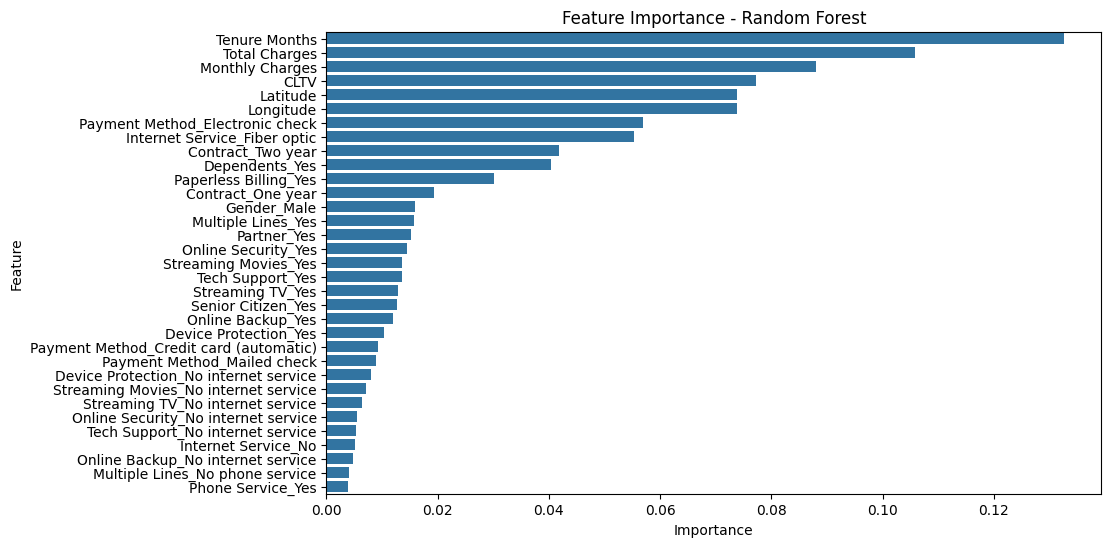

In [ ]:
# Feature Importance Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming rf is your trained Random Forest model
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance - Random Forest")
plt.show()



In [ ]:
## 2️ Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
Best accuracy: 0.8557654964954396
